In [1]:
import netCDF4 as nc
import pandas as pd
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import collections
import matplotlib.font_manager
import xarray as xr
import statistics
import geodatasets

In [50]:
!pwd

/home/maiampow/code


## NLDAS Data

In [2]:
# Defining path to GLDAS_NOAH10_M data
p = "/home/maiampow/remoteData/GLDAS_NEW/GLDAS_NOAH10_M/"

In [3]:
# Creating dataframe for only Mississippi Basin 

miss_region_df = pd.DataFrame()

#Iterating through files in path
for filename in os.listdir(p):
    try:
        #Reading in data as xarray then converting to DataFrame
        xd = xr.open_dataset(p+str(filename))
        xd_df = xd.to_dataframe()
        xd_df.reset_index(inplace=True)
        
        #Extracting only needed columns 
        int_df = xd_df[["time", "lon", "lat", "SWE_inst", 'SoilMoi0_10cm_inst',
           'SoilMoi10_40cm_inst', 'SoilMoi40_100cm_inst', 'SoilMoi100_200cm_inst']]    
        
        #Index where Mississippi Basin longitude/latitude coordinates are in the DataFrame
        df_slice = int_df[(int_df.lon.isin(list(np.arange(-90.5,-100,-0.5)))) & (int_df.lat.isin(list(np.arange(30.5,40,0.5))))]
        miss_region_df = pd.concat([miss_region_df, df_slice], axis=0)
        
    except:
        pass

In [4]:
#Sorting and shaping DataFrame
miss_region_df = miss_region_df.sort_values(by=['time'])
miss_region_df.reset_index(inplace=True)
miss_region_df

,index,time,lon,lat,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst
0,67449,1948-01-01,-90.5,39.5,3.806316,32.123287,92.026428,170.576889,278.188965
1,13141,1948-01-01,-92.5,31.5,2.229555,27.859627,83.313400,164.319550,260.117340
2,13140,1948-01-01,-92.5,30.5,1.618988,33.884422,101.597855,204.641144,346.735229
3,12999,1948-01-01,-93.5,39.5,8.648218,27.661360,84.057205,158.720032,252.469193
4,12998,1948-01-01,-93.5,38.5,4.152470,29.399712,90.760048,176.681396,292.177612
...,...,...,...,...,...,...,...,...,...
160795,12998,2014-12-01,-93.5,38.5,0.093266,30.214924,90.772018,181.880325,304.265106
160796,12999,2014-12-01,-93.5,39.5,0.034194,28.063148,84.597443,169.497864,283.173187
160797,13140,2014-12-01,-92.5,30.5,0.000000,32.061871,96.579048,194.730820,330.652588
160798,13142,2014-12-01,-92.5,32.5,0.000000,24.142153,72.722046,144.230743,233.939163


In [39]:
mississ_avg_df = pd.DataFrame()

for ts in list(collections.Counter(miss_region_df["time"]).keys()):
    sub_region_df = miss_region_df[miss_region_df["time"] == ts]
    mississ_avg_df = pd.concat([mississ_avg_df, sub_region_df.describe().iloc[1]], axis=1)

In [42]:
mississ_avg_df = mississ_avg_df.transpose()

In [44]:
trunc_nldas = mississ_avg_df[(mississ_avg_df['time'] > '2002-04-18 00:00:00') & (mississ_avg_df['time'] < '2014-12-31 00:00:00')]

In [45]:
trunc_nldas

,index,time,lon,lat,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst
mean,39769.5,2002-05-01,-95.0,35.0,0.0,27.850849,83.430878,161.056534,300.847504
mean,39769.5,2002-06-01,-95.0,35.0,0.0,26.660673,79.764427,152.99733,293.075409
mean,39769.5,2002-07-01,-95.0,35.0,0.0,25.896763,76.763695,141.349762,277.454376
mean,39769.5,2002-08-01,-95.0,35.0,0.0,24.13991,72.083038,132.881271,269.780029
mean,39769.5,2002-09-01,-95.0,35.0,0.0,22.446699,67.355751,123.209671,263.925323
...,...,...,...,...,...,...,...,...,...
mean,39769.5,2014-08-01,-95.0,35.0,0.0,21.316051,63.217739,116.984123,260.198944
mean,39769.5,2014-09-01,-95.0,35.0,0.0,21.880833,62.999062,107.587692,250.570816
mean,39769.5,2014-10-01,-95.0,35.0,0.0,23.376719,70.432167,120.297569,250.227936
mean,39769.5,2014-11-01,-95.0,35.0,0.130912,23.874025,73.75341,132.581177,254.966522


In [48]:
#Converting values to meters

trunc_nldas["SWE_inst"] = trunc_nldas["SWE_inst"]*0.001
trunc_nldas["SoilMoi0_10cm_inst"] = trunc_nldas["SoilMoi0_10cm_inst"]*0.001
trunc_nldas["SoilMoi10_40cm_inst"] = trunc_nldas["SoilMoi10_40cm_inst"]*0.001
trunc_nldas["SoilMoi40_100cm_inst"] = trunc_nldas["SoilMoi40_100cm_inst"]*0.001
trunc_nldas["SoilMoi100_200cm_inst"] = trunc_nldas["SoilMoi100_200cm_inst"]*0.001

/tmp/ipykernel_76783/839424738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trunc_nldas["SoilMoi0_10cm_inst"] = trunc_nldas["SoilMoi0_10cm_inst"]*0.001
/tmp/ipykernel_76783/839424738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trunc_nldas["SoilMoi10_40cm_inst"] = trunc_nldas["SoilMoi10_40cm_inst"]*0.001
/tmp/ipykernel_76783/839424738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [49]:
trunc_nldas

,index,time,lon,lat,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst
mean,39769.5,2002-05-01,-95.0,35.0,0.0,0.027851,0.083431,0.161057,0.300848
mean,39769.5,2002-06-01,-95.0,35.0,0.0,0.026661,0.079764,0.152997,0.293075
mean,39769.5,2002-07-01,-95.0,35.0,0.0,0.025897,0.076764,0.14135,0.277454
mean,39769.5,2002-08-01,-95.0,35.0,0.0,0.02414,0.072083,0.132881,0.26978
mean,39769.5,2002-09-01,-95.0,35.0,0.0,0.022447,0.067356,0.12321,0.263925
...,...,...,...,...,...,...,...,...,...
mean,39769.5,2014-08-01,-95.0,35.0,0.0,0.021316,0.063218,0.116984,0.260199
mean,39769.5,2014-09-01,-95.0,35.0,0.0,0.021881,0.062999,0.107588,0.250571
mean,39769.5,2014-10-01,-95.0,35.0,0.0,0.023377,0.070432,0.120298,0.250228
mean,39769.5,2014-11-01,-95.0,35.0,0.000131,0.023874,0.073753,0.132581,0.254967


In [92]:
#Creating column with only year and month

year_mon_nldas = []

for d in trunc_nldas["time"]:
    year_mon_nldas.append(str(d)[0:7])

In [94]:
trunc_nldas["year_mon"] = year_mon_nldas

/tmp/ipykernel_76783/4232225344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trunc_nldas["year_mon"] = year_mon_nldas


In [95]:
trunc_nldas

,index,time,lon,lat,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,year_mon
mean,39769.5,2002-05-01,-95.0,35.0,0.0,0.027851,0.083431,0.161057,0.300848,2002-05
mean,39769.5,2002-06-01,-95.0,35.0,0.0,0.026661,0.079764,0.152997,0.293075,2002-06
mean,39769.5,2002-07-01,-95.0,35.0,0.0,0.025897,0.076764,0.14135,0.277454,2002-07
mean,39769.5,2002-08-01,-95.0,35.0,0.0,0.02414,0.072083,0.132881,0.26978,2002-08
mean,39769.5,2002-09-01,-95.0,35.0,0.0,0.022447,0.067356,0.12321,0.263925,2002-09
...,...,...,...,...,...,...,...,...,...,...
mean,39769.5,2014-08-01,-95.0,35.0,0.0,0.021316,0.063218,0.116984,0.260199,2014-08
mean,39769.5,2014-09-01,-95.0,35.0,0.0,0.021881,0.062999,0.107588,0.250571,2014-09
mean,39769.5,2014-10-01,-95.0,35.0,0.0,0.023377,0.070432,0.120298,0.250228,2014-10
mean,39769.5,2014-11-01,-95.0,35.0,0.000131,0.023874,0.073753,0.132581,0.254967,2014-11


In [110]:
overlap_nldas = trunc_nldas[(trunc_nldas.year_mon.isin(overlap_set))]

In [111]:
overlap_nldas

,index,time,lon,lat,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,year_mon
mean,39769.5,2002-05-01,-95.0,35.0,0.0,0.027851,0.083431,0.161057,0.300848,2002-05
mean,39769.5,2002-08-01,-95.0,35.0,0.0,0.02414,0.072083,0.132881,0.26978,2002-08
mean,39769.5,2002-09-01,-95.0,35.0,0.0,0.022447,0.067356,0.12321,0.263925,2002-09
mean,39769.5,2002-10-01,-95.0,35.0,0.000023,0.027162,0.080392,0.144818,0.27413,2002-10
mean,39769.5,2002-11-01,-95.0,35.0,0.000007,0.026656,0.082098,0.163777,0.28732,2002-11
...,...,...,...,...,...,...,...,...,...,...
mean,39769.5,2014-06-01,-95.0,35.0,0.0,0.027338,0.081056,0.145997,0.283316,2014-06
mean,39769.5,2014-08-01,-95.0,35.0,0.0,0.021316,0.063218,0.116984,0.260199,2014-08
mean,39769.5,2014-09-01,-95.0,35.0,0.0,0.021881,0.062999,0.107588,0.250571,2014-09
mean,39769.5,2014-10-01,-95.0,35.0,0.0,0.023377,0.070432,0.120298,0.250228,2014-10


## GRACE Data

In [73]:
grace_path = '/home/maiampow/remoteData/GRACE/data/TELLUS_GRAC_L3_CSR_RL06_LND_v04/'

In [74]:
def read_data(path, filename, data):
    try:
        if filename.endswith('nc'):
            df = xr.open_dataset(path+str(filename))
            date = pd.to_datetime(df['time'].values[0])
            data['date'].append(date)
            region = df['lwe_thickness'].sel(lat=slice(30.5, 39.5), lon=slice(270.5, 279.5))
            data['lwe_thickness'].append(region.mean().values.item())
        else:
            pass
    except Exception as e:
        print(e)
        print(path)
        print(filename)

In [75]:
data = {'date':[], 'lwe_thickness':[]}

for filename in os.listdir(grace_path):
    read_data(grace_path, filename, data)

In [76]:
df = pd.DataFrame(data)
df = df.sort_values('date')

In [77]:
df

,date,lwe_thickness
162,2002-04-18 00:00:00,0.051939
161,2002-05-10 12:00:00,0.044236
160,2002-08-16 12:00:00,-0.108040
159,2002-09-16 00:00:00,-0.120404
158,2002-10-16 12:00:00,-0.060526
...,...,...
4,2017-01-21 00:00:00,0.054049
3,2017-03-31 12:00:00,0.073723
2,2017-04-24 12:00:00,0.050132
1,2017-05-13 00:00:00,0.058987


In [78]:
trunc_grace = df[(df['date'] > '2002-01-01 00:00:00') & (df['date'] < '2014-12-31 00:00:00')]

In [83]:
trunc_grace.reset_index(inplace=True)

In [87]:
#Creating column with only year and month

year_mon_grace = []

for d in trunc_grace["date"]:
    year_mon_grace.append(str(d)[0:7])

In [90]:
trunc_grace["year_mon"] = year_mon_grace

/tmp/ipykernel_76783/1312667246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trunc_grace["year_mon"] = year_mon_grace


In [91]:
trunc_grace

,index,date,lwe_thickness,year_mon
0,162,2002-04-18 00:00:00,0.051939,2002-04
1,161,2002-05-10 12:00:00,0.044236,2002-05
2,160,2002-08-16 12:00:00,-0.108040,2002-08
3,159,2002-09-16 00:00:00,-0.120404,2002-09
4,158,2002-10-16 12:00:00,-0.060526,2002-10
...,...,...,...,...
135,27,2014-06-13 00:00:00,0.034361,2014-06
136,26,2014-08-16 12:00:00,-0.036681,2014-08
137,25,2014-09-16 00:00:00,-0.072096,2014-09
138,24,2014-10-16 12:00:00,-0.073428,2014-10


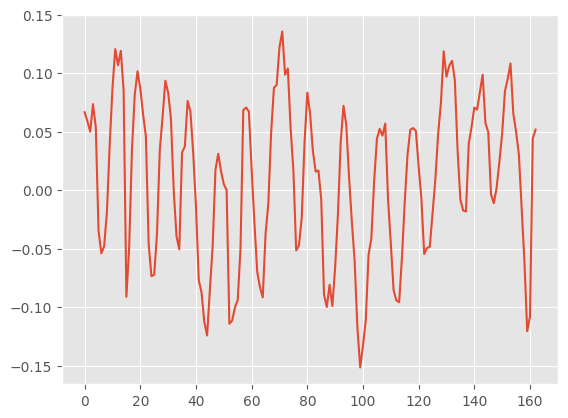

In [15]:
plt.style.use('ggplot')
plt.plot(df["lwe_thickness"])
plt.show()

## Finding overlap in NLDAS and GRACE months

In [98]:
gr_set = set(year_mon_grace)
nl_set = set(year_mon_nldas)

In [107]:
overlap_set = list(gr_set.intersection(nl_set))

In [108]:
overlap_grace = trunc_grace[(trunc_grace.year_mon.isin(overlap_set))]

In [114]:
overlap_grace

,index,date,lwe_thickness,year_mon
1,161,2002-05-10 12:00:00,0.044236,2002-05
2,160,2002-08-16 12:00:00,-0.108040,2002-08
3,159,2002-09-16 00:00:00,-0.120404,2002-09
4,158,2002-10-16 12:00:00,-0.060526,2002-10
5,157,2002-11-16 00:00:00,-0.015423,2002-11
...,...,...,...,...
135,27,2014-06-13 00:00:00,0.034361,2014-06
136,26,2014-08-16 12:00:00,-0.036681,2014-08
137,25,2014-09-16 00:00:00,-0.072096,2014-09
138,24,2014-10-16 12:00:00,-0.073428,2014-10


In [119]:
overlap_grace.iloc[108]

index                             53
date             2011-10-16 12:00:00
lwe_thickness              -0.111376
year_mon                     2011-10
Name: 109, dtype: object

In [120]:
#Deleting redundant row
overlap_grace = overlap_grace.drop(labels=108, axis=0)

In [122]:
overlap_grace.reset_index(inplace=True)

# ΔGW = ΔTWS - (ΔSM + ΔSWE)

In [157]:
overlap_nldas

,index,time,lon,lat,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,year_mon
mean,39769.5,2002-05-01,-95.0,35.0,0.0,0.027851,0.083431,0.161057,0.300848,2002-05
mean,39769.5,2002-08-01,-95.0,35.0,0.0,0.02414,0.072083,0.132881,0.26978,2002-08
mean,39769.5,2002-09-01,-95.0,35.0,0.0,0.022447,0.067356,0.12321,0.263925,2002-09
mean,39769.5,2002-10-01,-95.0,35.0,0.000023,0.027162,0.080392,0.144818,0.27413,2002-10
mean,39769.5,2002-11-01,-95.0,35.0,0.000007,0.026656,0.082098,0.163777,0.28732,2002-11
...,...,...,...,...,...,...,...,...,...,...
mean,39769.5,2014-06-01,-95.0,35.0,0.0,0.027338,0.081056,0.145997,0.283316,2014-06
mean,39769.5,2014-08-01,-95.0,35.0,0.0,0.021316,0.063218,0.116984,0.260199,2014-08
mean,39769.5,2014-09-01,-95.0,35.0,0.0,0.021881,0.062999,0.107588,0.250571,2014-09
mean,39769.5,2014-10-01,-95.0,35.0,0.0,0.023377,0.070432,0.120298,0.250228,2014-10


In [164]:
gw_estimate_soil0 = []

for i in range(0, len(overlap_grace)):
    gw_estimate_soil0.append(  overlap_grace["lwe_thickness"][i] - ( overlap_nldas["SoilMoi0_10cm_inst"][i] + overlap_nldas["SWE_inst"][i] ) )

In [165]:
gw_estimate_soil10 = []

for i in range(0, len(overlap_grace)):
    gw_estimate_soil10.append(  overlap_grace["lwe_thickness"][i] - ( overlap_nldas["SoilMoi10_40cm_inst"][i] + overlap_nldas["SWE_inst"][i] ) )

In [166]:
gw_estimate_soil40 = []

for i in range(0, len(overlap_grace)):
    gw_estimate_soil40.append(  overlap_grace["lwe_thickness"][i] - ( overlap_nldas["SoilMoi40_100cm_inst"][i] + overlap_nldas["SWE_inst"][i] ) )

In [167]:
gw_estimate_soil100 = []

for i in range(0, len(overlap_grace)):
    gw_estimate_soil100.append(  overlap_grace["lwe_thickness"][i] - ( overlap_nldas["SoilMoi100_200cm_inst"][i] + overlap_nldas["SWE_inst"][i] ) )

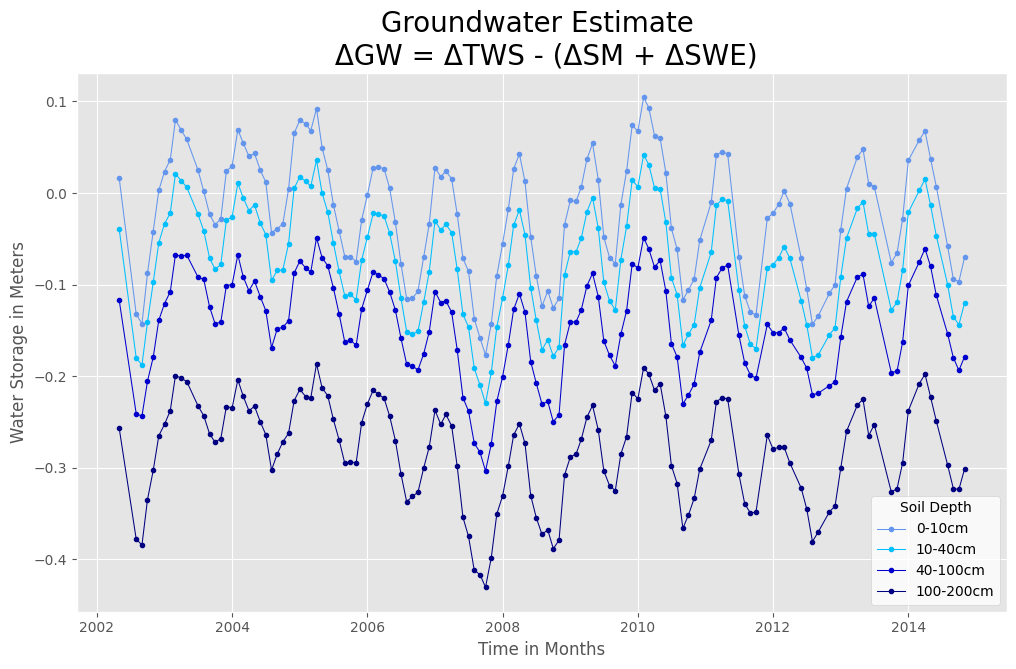

In [200]:
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
plt.plot(overlap_nldas["time"],gw_estimate_soil0,color="cornflowerblue", marker=".", linewidth=0.75)
plt.plot(overlap_nldas["time"],gw_estimate_soil10, color="deepskyblue", marker=".", linewidth=0.75)
plt.plot(overlap_nldas["time"],gw_estimate_soil40, color="mediumblue", marker=".", linewidth=0.75)
plt.plot(overlap_nldas["time"],gw_estimate_soil100, color="navy", marker=".", linewidth=0.75)
plt.title("Groundwater Estimate \n ΔGW = ΔTWS - (ΔSM + ΔSWE)",fontsize=20)
plt.xlabel("Time in Months")
plt.ylabel("Water Storage in Meters")
#plt.xticks(overlap_grace["year_mon"], rotation=90,fontsize=6)
plt.legend(["0-10cm", "10-40cm", "40-100cm", "100-200cm"],facecolor='w', title="Soil Depth")
plt.show()